In [1]:
import os
import xarray as xr
import numpy as np
import sys
from glob import glob
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cmasher as cmr
import matplotlib.colors as mcolors
import cmocean
from tqdm import tqdm

island_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 100, 105, 140, 150, 200, 220, 269, 300, 330, 350]

ds = xr.open_dataset('/home/ocean_personal_data/albinski/croco_grd.nc')

mask_psi = ds['mask_psi'].values
lon_psi = ds['lon_psi'].values
lat_psi = ds['lat_psi'].values

distance_to_coast_psi = distance_transform_edt(mask_psi)

clustering_labels = np.load('/home/ocean_personal_data/albinski/updated_clustering_labels_psi.npy')

labels_grid = np.full(mask_psi.shape, -1)
labels_grid[np.where(mask_psi == 0)] = clustering_labels

distances, indices = distance_transform_edt(mask_psi != 0, return_indices=True)
nearest_land_indices = tuple(indices[i, mask_psi != 0] for i in range(len(indices)))

ocean_labels = labels_grid[nearest_land_indices]
final_labels_grid_psi = np.full(mask_psi.shape, -1)
final_labels_grid_psi[mask_psi != 0] = ocean_labels

final_labels_grid_masked_psi = np.ma.masked_where(final_labels_grid_psi == -1, final_labels_grid_psi)

coastal_cells_mask = distance_to_coast_psi <= 4
coastal_island_ids = final_labels_grid_psi[coastal_cells_mask]
highlighted_grid = np.full(mask_psi.shape, -1)
highlighted_grid[coastal_cells_mask] = coastal_island_ids

dict_total = {}

for i in island_ids:

    smoothed_values_all = np.load(f'/home/ocean_personal_data/albinski/AVG_RUNS_Smoothed/avg_{i}.npy')

    total_values_by_island = {}

    shifted_highlighted_grid = highlighted_grid[:-1, :-1]

    unique_islands = np.unique(shifted_highlighted_grid[shifted_highlighted_grid != -1])
    for island_id in unique_islands:
        island_mask = shifted_highlighted_grid == island_id
        total_value = np.nansum(smoothed_values_all[island_mask])
        total_values_by_island[island_id] = total_value

    total_values_by_island
    total_mass_per_island = sum(total_values_by_island.values())
    dict_total[i] = total_mass_per_island

print(dict_total)

{2: 0.7965074020497461, 3: 0.9874290311040909, 4: 2.749612006356168, 5: 4.5890287487014145, 6: 11.884216019134978, 7: 10.409140685226534, 8: 1.9999652222323183, 9: 1.1260073419732899, 10: 0.9751189532592466, 11: 3.1416182880409615, 12: 3.2239837911495917, 13: 2.4403188325982894, 14: 3.7498384368154354, 15: 9.442739266760965, 16: 5.04601389000886, 17: 2.3018108886441904, 18: 1.4531448671753129, 19: 4.197209834894977, 20: 8.247919810150028, 21: 2.198967857226449, 22: 10.18242387708145, 23: 1.172374665121021, 24: 1.762223875020413, 25: 2.0837753429669506, 26: 1.4755827344747459, 27: 0.3122808949462803, 28: 0.40261340825575775, 29: 0.5002172838600719, 30: 0.37970656475117115, 31: 0.24891185118038833, 33: 1.834364860777349, 34: 5.926609424787192, 35: 1.9956991986878747, 36: 0.6476038410083353, 37: 1.5757395687707583, 38: 0.8192841684357148, 39: 0.3541397568418878, 40: 0.22444915204709653, 41: 0.46502885657557713, 42: 16.016046033270868, 43: 0.24462453467435727, 44: 1.9358596848956988, 45: 0

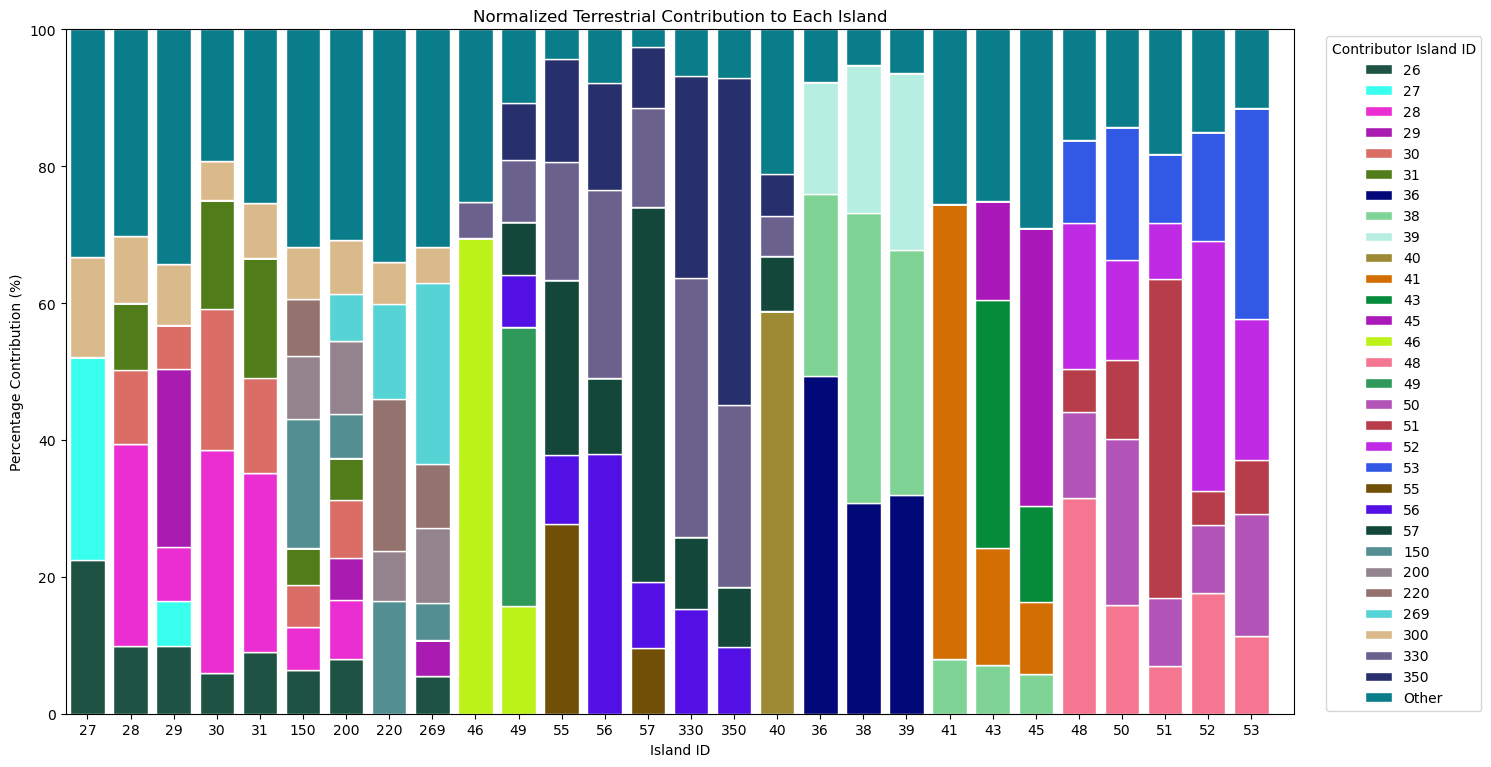

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

island_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 100, 105, 140, 150, 200, 220, 269, 300, 330, 350]
target_islands = [27,28,29,30,31,150,200,220,269,46,49, 55,56,57,330,350,40, 36,38,39,41,43,45,48,50,51,52,53]

island_names = {6: 'Reunion', 7: 'Mauritius',8:'Flat Island',9:'Round Island',10: 'Island of Rodrigues',
                26: 'Agalega Islands', 27: 'Astove Island',28:'Grande Ile + Ile Sud Ouest',29: 'Assomption',
                30: 'Cosmoledo',31: 'Ile Nord-Est + Ile Du Nord', 150: 'NE Aldabra', 200: 'SE Aldabra',
                220: 'NW Aldabra',269: 'SW Aldabra', 330: 'N Mahe', 350: 'S Mahe',55:'Fregate', 56: 'Silhouette',57: 'Praslin',
                46:'Ile Du Sud + Poivre', 49: 'Amirante Islands', 40: 'Coëtivy', 23: 'Grande Glorieuse',
                36: 'S Diego Garcia', 38: 'NW Diego Garcia', 39: 'NE Diego Garcia', 41 : 'Eggmont Island + Ile Sudest', 43: 'Danger Island',
                45: 'Eagle Island', 48: 'Ile Poele + Ile du Coin', 50: 'Grande Ile', 51: 'Ile Boddam', 52: 'Ile Diamant + Ile Pierre', 53: 'Ile Yeye'}

island_plastic_contributions = {2:1, 3: 34522, 4: 45995, 5: 45995, 6:847, 7: 56051, 8:56051, 9:56051, 10:56051,
                                11:34522, 12:34522, 13:34522, 14:34522, 15: 58032, 16:34522, 17:34522,
                                18: 58032, 19: 58032, 20: 58032, 21: 45995, 22: 58032, 23: 1, 24: 45995, 25: 45995,
                                26: 56051, 27: 4619, 28: 4619,
                                29: 4619, 30: 4619, 31: 4619, 33: 48586, 34: 48586, 35: 48586, 36: 847, 37: 48586,
                                38: 847, 39: 847, 40: 4619,
                                41: 847, 42: 48586, 43: 847, 44:48586, 45: 847,46: 4619, 47: 48586, 
                                48: 847, 49: 4619,  50: 847, 51: 847, 52: 847, 
                                53: 847, 55: 4619, 56: 4619, 57: 4619,
                                58:31469, 59:31469, 60:31469, 
                                100: 62095, 105: 48586, 140: 45995, 150: 4619, 200: 4619, 220: 4619, 269: 4619, 
                                300:34522, 330: 4619, 350: 4619
                                 }
all_contributions = {island_id: {} for island_id in island_ids}

for target_island in target_islands:
    avg_mass_array = np.load(f'/home/ocean_personal_data/albinski/AVG_RUNS_Smoothed/avg_{target_island}.npy')

    contributions = {}
    total_mass = dict_total.get(target_island)

    for island_id in island_ids:
        mass_contribution = np.nansum(avg_mass_array[shifted_highlighted_grid == island_id])
        percentage_contribution = (mass_contribution / total_mass) * 100 if total_mass > 0 else 0
        contributions[island_id] = percentage_contribution

    other_contribution = sum(value for key, value in contributions.items() if value < 5)
    contributions = {key: value for key, value in contributions.items() if value >= 5}
    if other_contribution > 0:
        contributions['Other'] = other_contribution

    all_contributions[target_island] = contributions

plt.figure(figsize=(15, 8))

x_positions = np.arange(len(target_islands))
unique_contributors = set(key for contribs in all_contributions.values() for key in contribs.keys())

def generate_bright_colors(n):
    return ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(n)]

color_palette = generate_bright_colors(len(unique_contributors))

bottom = np.zeros(len(target_islands))

integer_contributors = [contributor for contributor in unique_contributors if isinstance(contributor, int)]
sorted_contributors = sorted(integer_contributors)
if 'Other' in unique_contributors:
    sorted_contributors.append('Other')

for idx, contributor_id in enumerate(sorted_contributors):
    contributions = [all_contributions[target_island].get(contributor_id, 0) for target_island in target_islands]
    plt.bar(x_positions, contributions, bottom=bottom, color=color_palette[idx], edgecolor='white', label=str(contributor_id))
    bottom += np.array(contributions)

plt.xlabel('Island ID')
plt.ylabel('Percentage Contribution (%)')
plt.title('Normalized Terrestrial Contribution to Each Island')
plt.xticks(x_positions, target_islands)
plt.legend(title='Contributor Island ID', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlim(-0.5, 28)
plt.ylim(0,100)
plt.tight_layout()
plt.show()


[ -1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56
  57  58  59  60 100 105 140 150 200 220 269 300 330 350]


/home/users/ug20g1/miniconda3/envs/initialenv/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/users/ug20g1/miniconda3/envs/initialenv/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/users/ug20g1/miniconda3/envs/initialenv/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


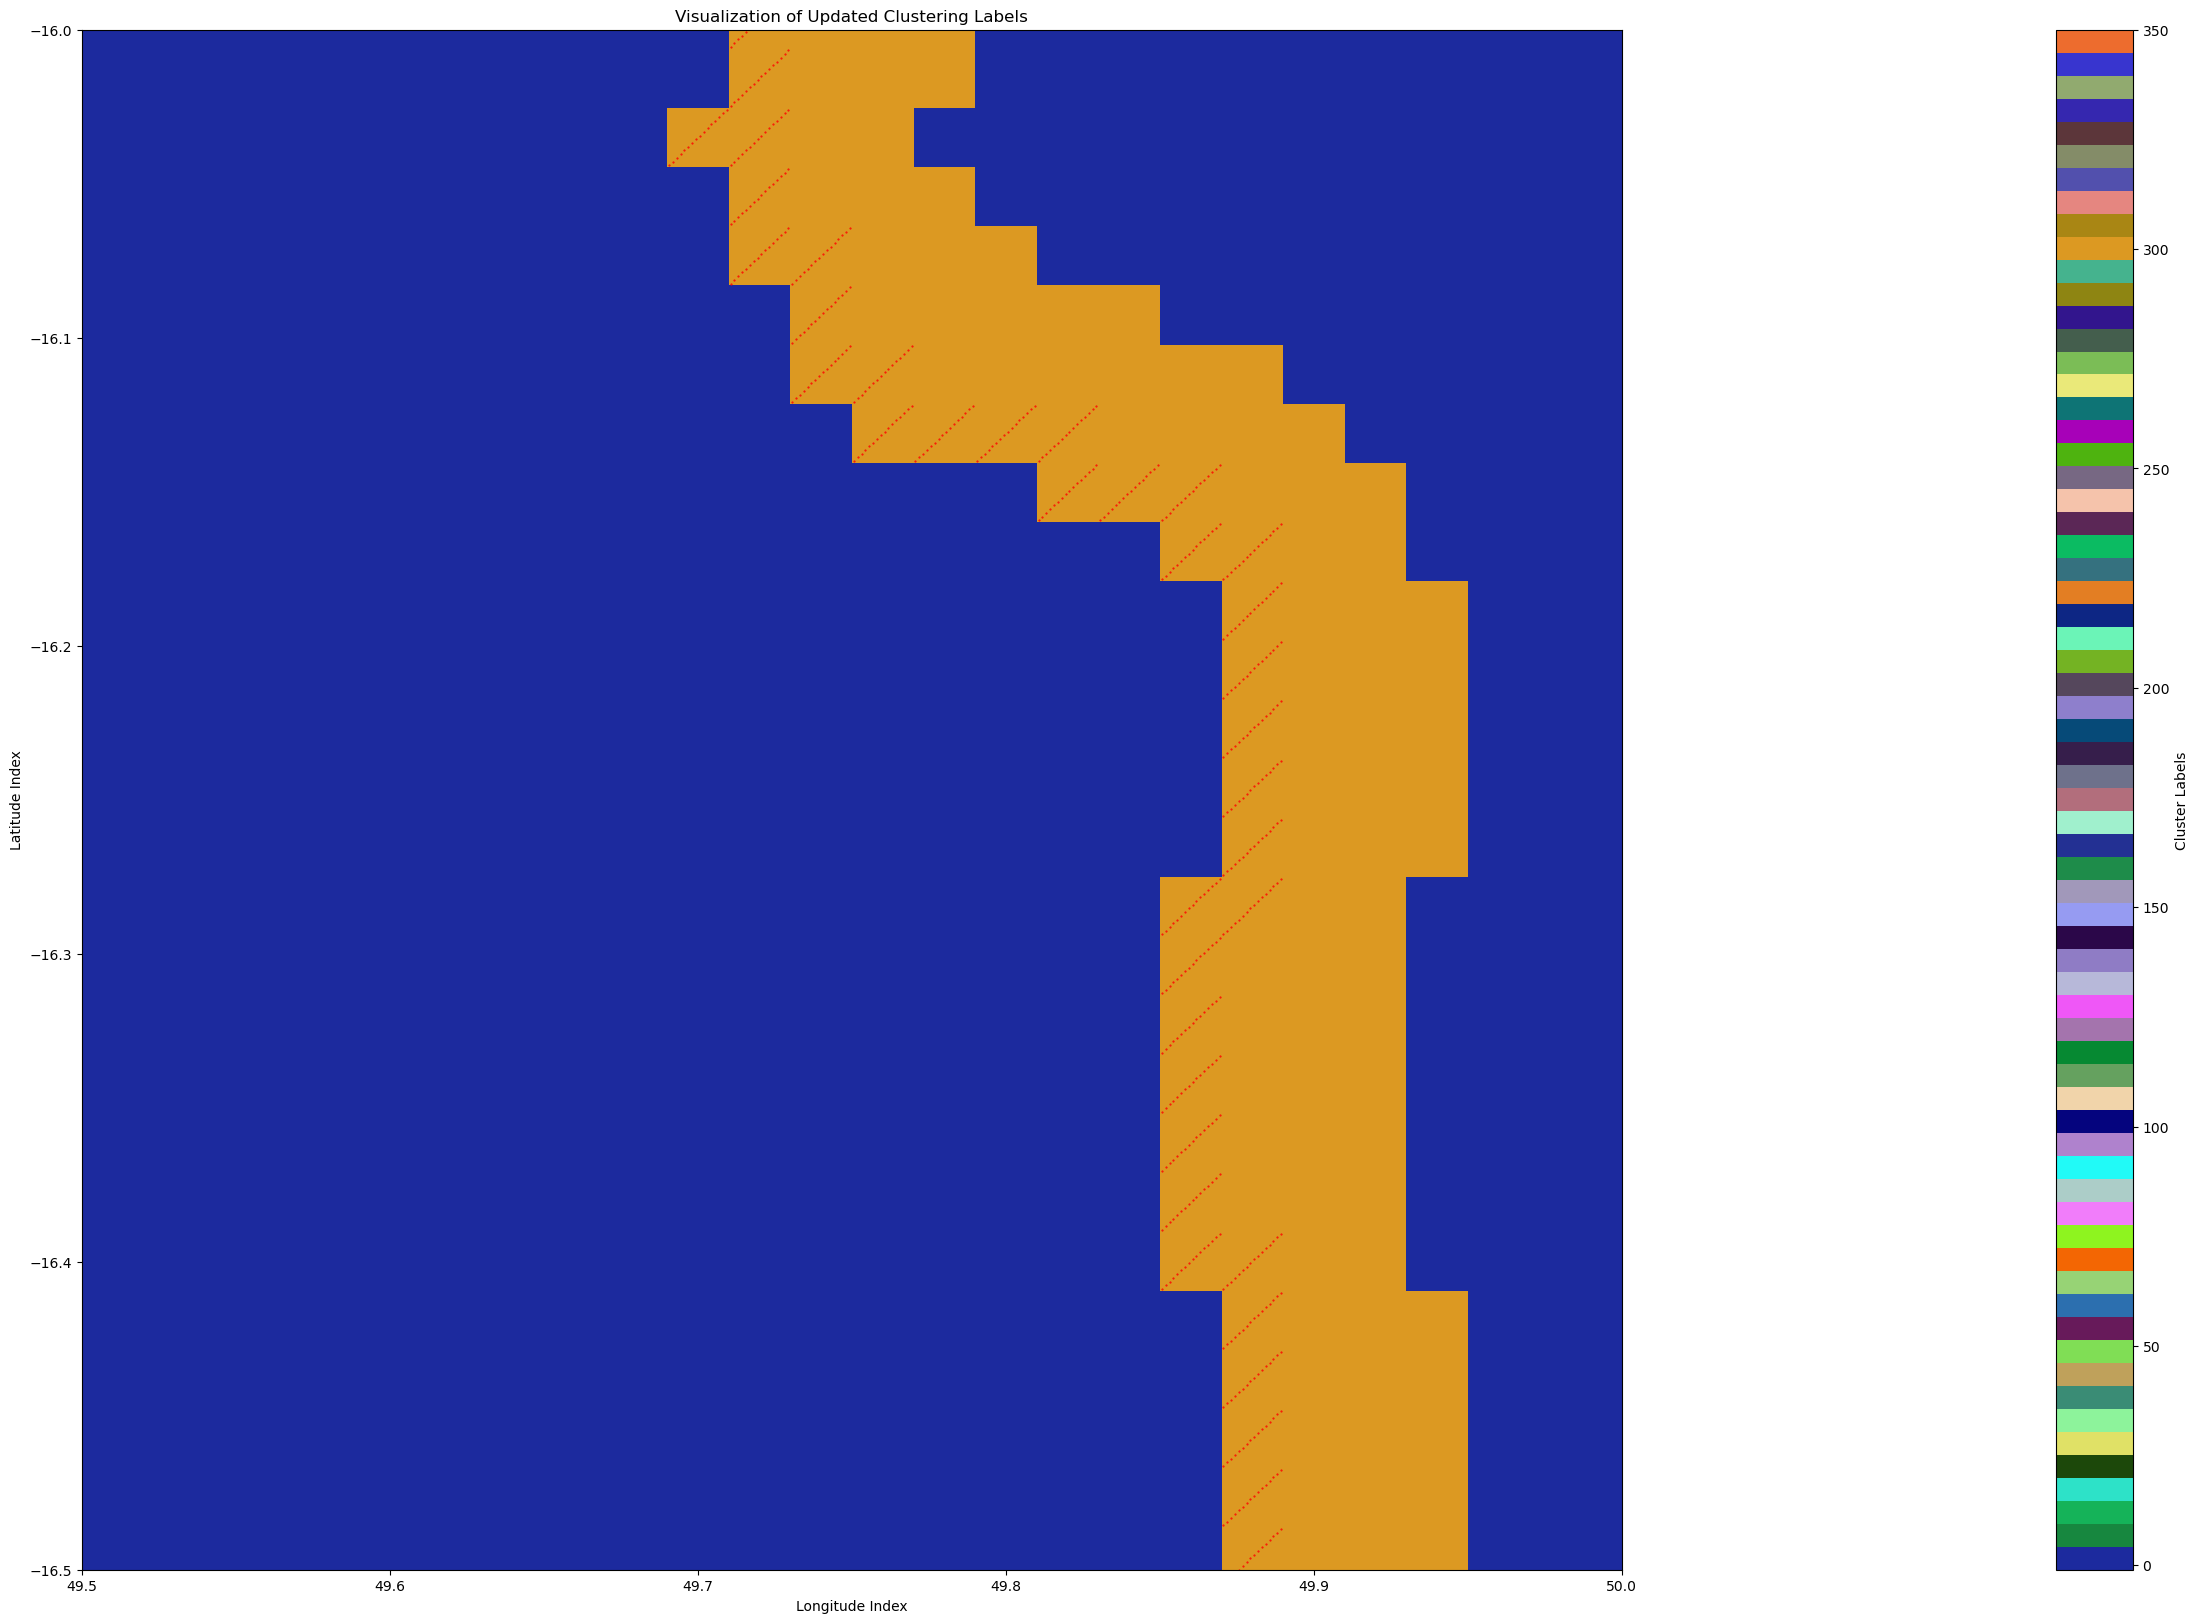

In [3]:
unique_labels = np.unique(highlighted_grid)
print(unique_labels)
unique_labels = unique_labels[unique_labels != -1]
colors = np.random.rand(len(unique_labels), 3)
random_cmap = ListedColormap(colors)
data = xr.open_dataset('/home/ocean_personal_data/albinski/RUNS_Trajs/1993_01_78w_s0.zarr')
f, ax = plt.subplots(1, 1, figsize=(112, 20))
plt.pcolormesh(lon_psi, lat_psi, shifted_highlighted_grid, cmap =random_cmap)
ax.scatter(data.lon_initial[:,1], data.lat_initial[:,1], c='r', s=1, marker='.')
plt.colorbar(label='Cluster Labels')
plt.title('Visualization of Updated Clustering Labels')
plt.xlabel('Longitude Index')
plt.ylabel('Latitude Index')
ax.set_aspect('equal')
plt.ylim(-16.5,-16)
plt.xlim(49.5,50)
plt.show()


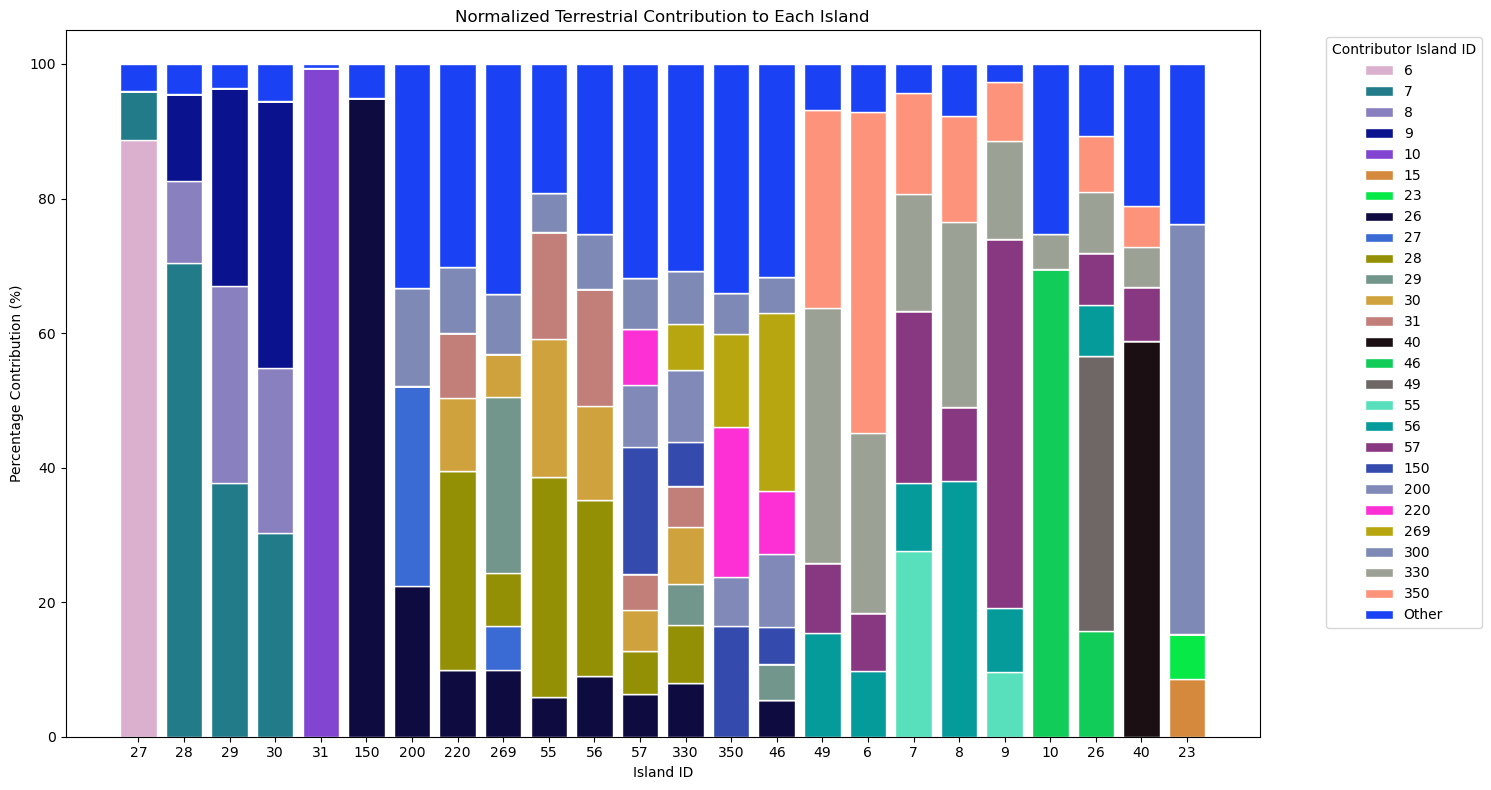

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

island_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 100, 105, 140, 150, 200, 220, 269, 300, 330, 350]
target_islands = [6,7,8,9,10, 26, 27,28,29,30,31,150,200,220,269,330,350,55,56,57,46,49,40,23]
all_contributions = {island_id: {} for island_id in island_ids}

for target_island in target_islands:
    avg_mass_array = np.load(f'/home/ocean_personal_data/albinski/AVG_RUNS_Smoothed/avg_{target_island}.npy')

    contributions = {}
    total_mass = dict_total.get(target_island)

    for island_id in island_ids:
        mass_contribution = np.nansum(avg_mass_array[shifted_highlighted_grid == island_id])
        percentage_contribution = (mass_contribution / total_mass) * 100 if total_mass > 0 else 0
        contributions[island_id] = percentage_contribution

    other_contribution = sum(value for key, value in contributions.items() if value < 5)
    contributions = {key: value for key, value in contributions.items() if value >= 5}
    if other_contribution > 0:
        contributions['Other'] = other_contribution

    all_contributions[target_island] = contributions

plt.figure(figsize=(15, 8))

x_positions = np.arange(len(target_islands))
unique_contributors = set(key for contribs in all_contributions.values() for key in contribs.keys())

def generate_bright_colors(n):
    return ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(n)]

color_palette = generate_bright_colors(len(unique_contributors))

bottom = np.zeros(len(target_islands))

integer_contributors = [contributor for contributor in unique_contributors if isinstance(contributor, int)]
sorted_contributors = sorted(integer_contributors)
if 'Other' in unique_contributors:
    sorted_contributors.append('Other')

for idx, contributor_id in enumerate(sorted_contributors):
    contributions = [all_contributions[target_island].get(contributor_id, 0) for target_island in target_islands]
    plt.bar(x_positions, contributions, bottom=bottom, color=color_palette[idx], edgecolor='white', label=str(contributor_id))
    bottom += np.array(contributions)

group1 = [27, 28, 29, 30, 31, 150, 200, 220, 269]
group2 = [55, 56, 57, 330, 350]
group3 = [46, 49]
group4 = [6, 7, 8, 9]

rest_of_islands = [island for island in target_islands if island not in group1 + group2 + group3 + group4]

target_islands = group1 + group2 + group3 + group4 + rest_of_islands

x_positions = np.arange(len(target_islands))

plt.xlabel('Island ID')
plt.ylabel('Percentage Contribution (%)')
plt.title('Normalized Terrestrial Contribution to Each Island')

plt.xticks(x_positions, target_islands)
plt.legend(title='Contributor Island ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


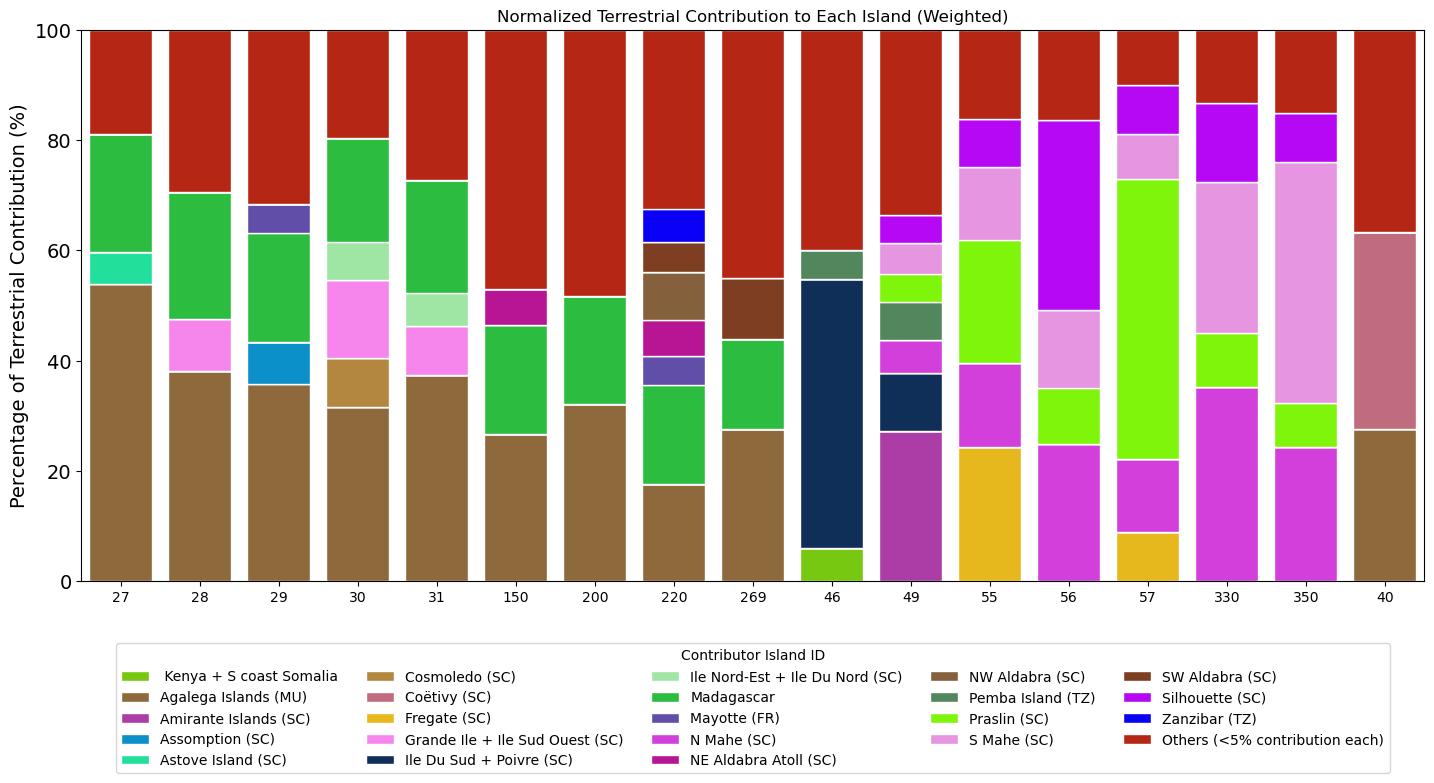

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

island_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 100, 105, 140, 150, 200, 220, 269, 300, 330, 350]
target_islands = [27,28,29,30,31,150,200,220,269,46,49, 55,56,57,330,350,40]

island_names = {15: 'Mayotte (FR)',42: 'Zanzibar (TZ)', 47: 'Pemba Island (TZ)',58:'W Addu City (MV)',59: 'E Addu City (MV)',60:'Fuvahmulah (MV)',100: ' Kenya + S coast Somalia',300: 'Madagascar',6: 'Reunion', 7: 'Mauritius (MU)', 8: 'Flat Island (MU)', 9: 'Round Island (MU)', 10: 'Island of Rodrigues (MU)', 26: 'Agalega Islands (MU)', 27: 'Astove Island (SC)', 28: 'Grande Ile + Ile Sud Ouest (SC)', 29: 'Assomption (SC)', 30: 'Cosmoledo (SC)', 31: 'Ile Nord-Est + Ile Du Nord (SC)', 150: 'NE Aldabra Atoll (SC)', 200: 'SE Aldabra Atoll (SC)', 220: 'NW Aldabra (SC)', 269: 'SW Aldabra (SC)', 330: 'N Mahe (SC)', 350: 'S Mahe (SC)', 55: 'Fregate (SC)', 56: 'Silhouette (SC)', 57: 'Praslin (SC)', 46: 'Ile Du Sud + Poivre (SC)', 49: 'Amirante Islands (SC)', 40: 'Coëtivy (SC)', 23: 'Grande Glorieuse (FR)', 36: 'S Diego Garcia (IO)', 38: 'NW Diego Garcia (IO)', 39: 'NE Diego Garcia (IO)', 41: 'Eggmont Island + Ile Sudest (IO)', 43: 'Danger Island (IO)', 45: 'Eagle Island (IO)', 48: 'Ile Poele + Ile du Coin (IO)', 50: 'Grande Ile (IO)', 51: 'Ile Boddam (IO)', 52: 'Ile Diamant + Ile Pierre (IO)', 53: 'Ile Yeye (IO)'}

island_plastic_contributions = {2:1, 3: 34522, 4: 45995, 5: 45995, 6:847, 7: 56051, 8:56051, 9:56051, 10:56051,
                                11:34522, 12:34522, 13:34522, 14:34522, 15: 58032, 16:34522, 17:34522,
                                18: 58032, 19: 58032, 20: 58032, 21: 45995, 22: 58032, 23: 1, 24: 45995, 25: 45995,
                                26: 56051, 27: 4619, 28: 4619,
                                29: 4619, 30: 4619, 31: 4619, 33: 48586, 34: 48586, 35: 48586, 36: 847, 37: 48586,
                                38: 847, 39: 847, 40: 4619,
                                41: 847, 42: 48586, 43: 847, 44:48586, 45: 847,46: 4619, 47: 48586, 
                                48: 847, 49: 4619,  50: 847, 51: 847, 52: 847, 
                                53: 847, 55: 4619, 56: 4619, 57: 4619,
                                58:31469, 59:31469, 60:31469, 
                                100: 62095, 105: 48586, 140: 45995, 150: 4619, 200: 4619, 220: 4619, 269: 4619, 
                                300:34522, 330: 4619, 350: 4619
                                 }

all_contributions = {island_id: {} for island_id in island_ids}

for target_island in target_islands:
    avg_mass_array = np.load(f'/home/ocean_personal_data/albinski/AVG_RUNS_Smoothed/avg_{target_island}.npy')
    contributions = {}
    total_mass = 0
    for island_id in island_ids:
        mass_contribution = np.nansum(avg_mass_array[shifted_highlighted_grid == island_id])
        weighted_mass_contribution = mass_contribution * island_plastic_contributions.get(island_id, 1)
        contributions[island_id] = weighted_mass_contribution
        total_mass += weighted_mass_contribution
    for island_id in contributions.keys():
        percentage_contribution = (contributions[island_id] / total_mass) * 100 if total_mass > 0 else 0
        contributions[island_id] = percentage_contribution
    other_contribution = sum(value for key, value in contributions.items() if value < 5)
    contributions = {key: value for key, value in contributions.items() if value >= 5}
    if other_contribution > 0:
        contributions['Others (<5% contribution each)'] = other_contribution
    all_contributions[target_island] = contributions

plt.figure(figsize=(15, 8))
x_positions = np.arange(len(target_islands))
unique_contributors = set(key for contribs in all_contributions.values() for key in contribs.keys())

color_palette = generate_bright_colors(len(unique_contributors))
bottom = np.zeros(len(target_islands))
integer_contributors = [contributor for contributor in unique_contributors if isinstance(contributor, int)]
sorted_contributors = sorted(integer_contributors, key=lambda x: island_names.get(x, str(x)))
if 'Others (<5% contribution each)' in unique_contributors:
    sorted_contributors.append('Others (<5% contribution each)')

for idx, contributor_id in enumerate(sorted_contributors):
    contributions = [all_contributions[target_island].get(contributor_id, 0) for target_island in target_islands]
    name = island_names.get(contributor_id, str(contributor_id))
    plt.bar(x_positions, contributions, bottom=bottom, color=color_palette[idx], edgecolor='white', label=name)
    bottom += np.array(contributions)

plt.ylabel('Percentage of Terrestrial Contribution (%)', fontsize = 14)
plt.title('Normalized Terrestrial Contribution to Each Island (Weighted)')
plt.xticks(x_positions, target_islands)
plt.yticks(fontsize = 14)
plt.legend(title='Contributor Island ID', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=5)

plt.xlim(-0.5, len(target_islands) - 0.5)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('domain_map.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()



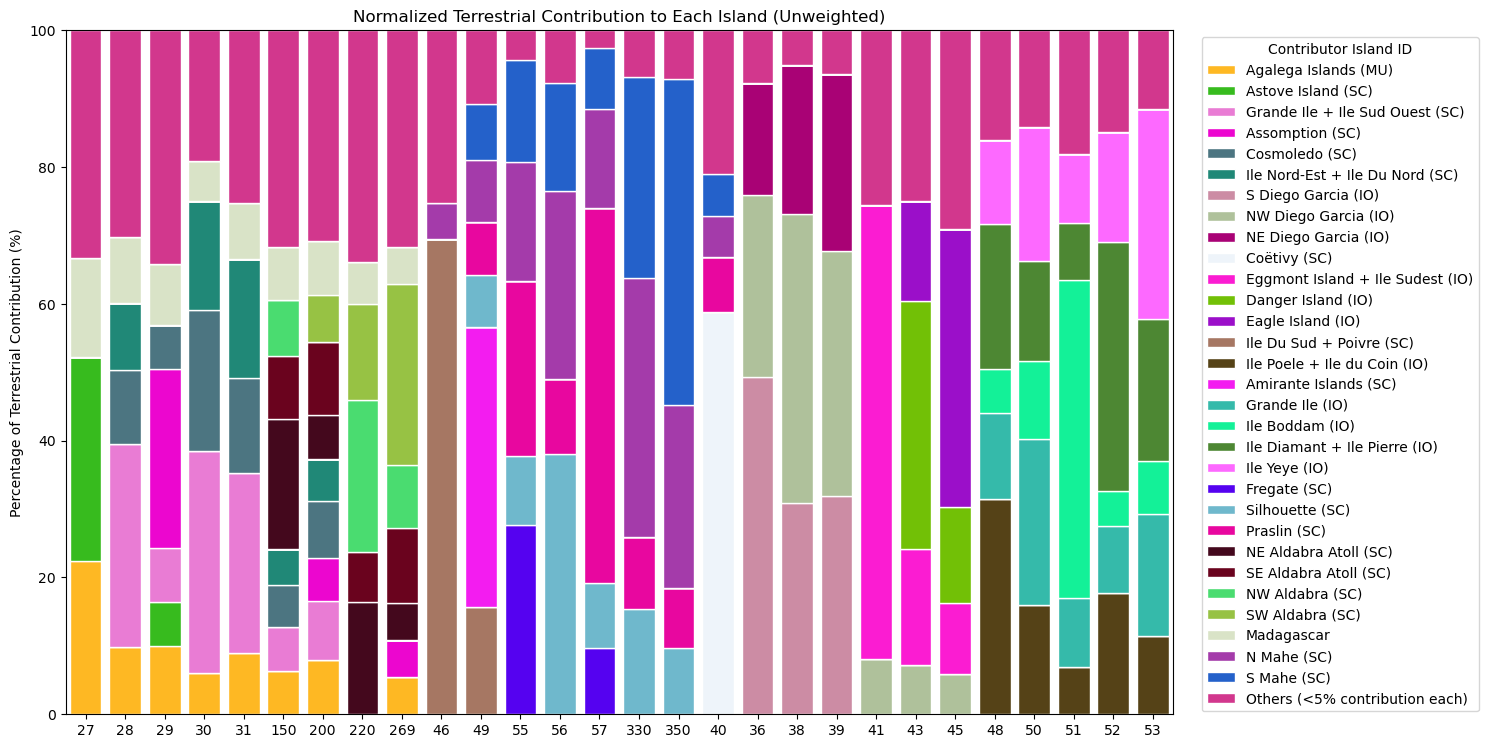

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

island_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 100, 105, 140, 150, 200, 220, 269, 300, 330, 350]
target_islands = [27,28,29,30,31,150,200,220,269,46,49,55,56,57,330,350,40,36,38,39,41,43,45,48,50,51,52,53]

island_names = {15: 'Mayotte (FR)',42: 'Zanzibar (TZ)', 47: 'Pemba Island (TZ)',58:'W Addu City (MV)',59: 'E Addu City (MV)',60:'Fuvahmulah (MV)',100: ' Kenya + S coast Somalia',300: 'Madagascar',6: 'Reunion', 7: 'Mauritius (MU)', 8: 'Flat Island (MU)', 9: 'Round Island (MU)', 10: 'Island of Rodrigues (MU)', 26: 'Agalega Islands (MU)', 27: 'Astove Island (SC)', 28: 'Grande Ile + Ile Sud Ouest (SC)', 29: 'Assomption (SC)', 30: 'Cosmoledo (SC)', 31: 'Ile Nord-Est + Ile Du Nord (SC)', 150: 'NE Aldabra Atoll (SC)', 200: 'SE Aldabra Atoll (SC)', 220: 'NW Aldabra (SC)', 269: 'SW Aldabra (SC)', 330: 'N Mahe (SC)', 350: 'S Mahe (SC)', 55: 'Fregate (SC)', 56: 'Silhouette (SC)', 57: 'Praslin (SC)', 46: 'Ile Du Sud + Poivre (SC)', 49: 'Amirante Islands (SC)', 40: 'Coëtivy (SC)', 23: 'Grande Glorieuse (FR)', 36: 'S Diego Garcia (IO)', 38: 'NW Diego Garcia (IO)', 39: 'NE Diego Garcia (IO)', 41: 'Eggmont Island + Ile Sudest (IO)', 43: 'Danger Island (IO)', 45: 'Eagle Island (IO)', 48: 'Ile Poele + Ile du Coin (IO)', 50: 'Grande Ile (IO)', 51: 'Ile Boddam (IO)', 52: 'Ile Diamant + Ile Pierre (IO)', 53: 'Ile Yeye (IO)'}

all_contributions = {island_id: {} for island_id in island_ids}

for target_island in target_islands:
    avg_mass_array = np.load(f'/home/ocean_personal_data/albinski/AVG_RUNS_Smoothed/avg_{target_island}.npy')
    contributions = {}
    total_mass = dict_total.get(target_island)
    for island_id in island_ids:
        mass_contribution = np.nansum(avg_mass_array[shifted_highlighted_grid == island_id])
        percentage_contribution = (mass_contribution / total_mass) * 100 if total_mass > 0 else 0
        contributions[island_id] = percentage_contribution
    other_contribution = sum(value for key, value in contributions.items() if value < 5)
    contributions = {key: value for key, value in contributions.items() if value >= 5}
    if other_contribution > 0:
        contributions['Others (<5% contribution each)'] = other_contribution
    all_contributions[target_island] = contributions

plt.figure(figsize=(15, 8))

x_positions = np.arange(len(target_islands))
unique_contributors = set(key for contribs in all_contributions.values() for key in contribs.keys())

def generate_bright_colors(n):
    return ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(n)]

color_palette = generate_bright_colors(len(unique_contributors))

bottom = np.zeros(len(target_islands))

integer_contributors = [contributor for contributor in unique_contributors if isinstance(contributor, int)]
sorted_contributors = sorted(integer_contributors)
if 'Others (<5% contribution each)' in unique_contributors:
    sorted_contributors.append('Others (<5% contribution each)')

for idx, contributor_id in enumerate(sorted_contributors):
    contributions = [all_contributions[target_island].get(contributor_id, 0) for target_island in target_islands]
    plt.bar(x_positions, contributions, bottom=bottom, color=color_palette[idx], edgecolor='white', label=island_names.get(contributor_id, str(contributor_id)))
    bottom += np.array(contributions)

plt.ylabel('Percentage of Terrestrial Contribution (%)')
plt.title('Normalized Terrestrial Contribution to Each Island (Unweighted)')
plt.xticks(x_positions, target_islands)
plt.legend(title='Contributor Island ID', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlim(-0.5, 27.5)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('domain_map.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()


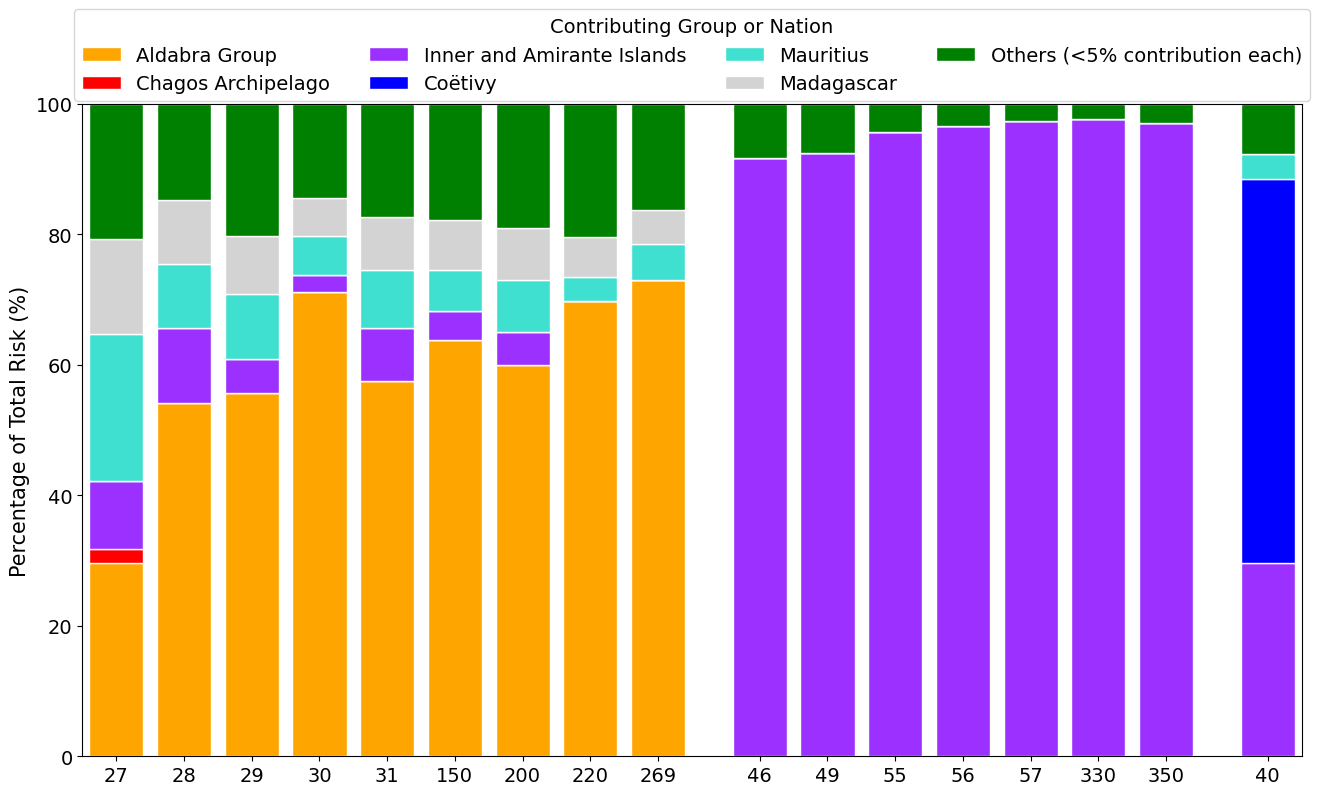

In [7]:
import os
import xarray as xr
import numpy as np
import sys
from glob import glob
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cmasher as cmr
import matplotlib.colors as mcolors
import cmocean
from tqdm import tqdm

island_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 100, 105, 140, 150, 200, 220, 269, 300, 330, 350]

ds = xr.open_dataset('/home/ocean_personal_data/albinski/croco_grd.nc')

mask_psi = ds['mask_psi'].values
lon_psi = ds['lon_psi'].values
lat_psi = ds['lat_psi'].values

distance_to_coast_psi = distance_transform_edt(mask_psi)

clustering_labels = np.load('/home/ocean_personal_data/albinski/updated_clustering_labels_psi.npy')

labels_grid = np.full(mask_psi.shape, -1)
labels_grid[np.where(mask_psi == 0)] = clustering_labels

distances, indices = distance_transform_edt(mask_psi != 0, return_indices=True)
nearest_land_indices = tuple(indices[i, mask_psi != 0] for i in range(len(indices)))

ocean_labels = labels_grid[nearest_land_indices]
final_labels_grid_psi = np.full(mask_psi.shape, -1)
final_labels_grid_psi[mask_psi != 0] = ocean_labels

final_labels_grid_masked_psi = np.ma.masked_where(final_labels_grid_psi == -1, final_labels_grid_psi)

coastal_cells_mask = distance_to_coast_psi <= 4
coastal_island_ids = final_labels_grid_psi[coastal_cells_mask]
highlighted_grid = np.full(mask_psi.shape, -1)
highlighted_grid[coastal_cells_mask] = coastal_island_ids

dict_total = {}

for i in island_ids:

    smoothed_values_all = np.load(f'/home/ocean_personal_data/albinski/AVG_RUNS_Smoothed/avg_{i}.npy')

    total_values_by_island = {}

    shifted_highlighted_grid = highlighted_grid[:-1, :-1]

    unique_islands = np.unique(shifted_highlighted_grid[shifted_highlighted_grid != -1])
    for island_id in unique_islands:
        island_mask = shifted_highlighted_grid == island_id
        total_value = np.nansum(smoothed_values_all[island_mask])
        total_values_by_island[island_id] = total_value

    total_values_by_island
    total_mass_per_island = sum(total_values_by_island.values())
    dict_total[i] = total_mass_per_island


island_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 100, 105, 140, 150, 200, 220, 269, 300, 330, 350]
target_islands = [27,28,29,30,31,150,200,220,269,46,49,55,56,57,330,350,40]

island_groups = {
    'Aldabra Group': [27, 28, 29, 30, 31, 150, 200, 220, 269],
    'Chagos Archipelago': [36, 38, 39, 41, 43, 45, 48, 50, 51, 52, 53],
    'Inner and Amirante Islands': [46, 49, 55, 56, 57, 330, 350],
    'Coëtivy': [40],
    'Mauritius': [7,8,9,10, 26],
    'Madagascar':[300]

}

island_names = {15: 'Mayotte (FR)',42: 'Zanzibar (TZ)', 47: 'Pemba Island (TZ)',58:'W Addu City (MV)',59: 'E Addu City (MV)',60:'Fuvahmulah (MV)',100: ' Kenya + S coast Somalia',300: 'Madagascar',6: 'Reunion', 7: 'Mauritius (MU)', 8: 'Flat Island (MU)', 9: 'Round Island (MU)', 10: 'Island of Rodrigues (MU)', 26: 'Agalega Islands (MU)', 27: 'Astove Island (SC)', 28: 'Grande Ile + Ile Sud Ouest (SC)', 29: 'Assomption (SC)', 30: 'Cosmoledo (SC)', 31: 'Ile Nord-Est + Ile Du Nord (SC)', 150: 'NE Aldabra Atoll (SC)', 200: 'SE Aldabra Atoll (SC)', 220: 'NW Aldabra (SC)', 269: 'SW Aldabra (SC)', 330: 'N Mahe (SC)', 350: 'S Mahe (SC)', 55: 'Fregate (SC)', 56: 'Silhouette (SC)', 57: 'Praslin (SC)', 46: 'Ile Du Sud + Poivre (SC)', 49: 'Amirante Islands (SC)', 40: 'Coëtivy (SC)', 23: 'Grande Glorieuse (FR)', 36: 'S Diego Garcia (IO)', 38: 'NW Diego Garcia (IO)', 39: 'NE Diego Garcia (IO)', 41: 'Eggmont Island + Ile Sudest (IO)', 43: 'Danger Island (IO)', 45: 'Eagle Island (IO)', 48: 'Ile Poele + Ile du Coin (IO)', 50: 'Grande Ile (IO)', 51: 'Ile Boddam (IO)', 52: 'Ile Diamant + Ile Pierre (IO)', 53: 'Ile Yeye (IO)'}

island_group_lookup = {island_id: group_name for group_name, islands in island_groups.items() for island_id in islands}

all_contributions = {island_id: {} for island_id in island_ids}

for target_island in target_islands:
    avg_mass_array = np.load(f'/home/ocean_personal_data/albinski/AVG_RUNS_Smoothed/avg_{target_island}.npy')
    contributions = {}
    total_mass = dict_total.get(target_island)
    for island_id in island_ids:
        mass_contribution = np.nansum(avg_mass_array[shifted_highlighted_grid == island_id])
        percentage_contribution = (mass_contribution / total_mass) * 100 if total_mass > 0 else 0
        contributions[island_id] = percentage_contribution
    other_contribution = sum(value for key, value in contributions.items() if value < 2)
    contributions = {key: value for key, value in contributions.items() if value >= 2}
    if other_contribution > 0:
        contributions['Others (<5% contribution each)'] = other_contribution
    all_contributions[target_island] = contributions

grouped_contributions = {group_name: [0] * len(target_islands) for group_name in island_groups.keys()}
grouped_contributions['Others (<5% contribution each)'] = [0] * len(target_islands)

for idx, target_island in enumerate(target_islands):
    contributions = all_contributions[target_island]  
    for contributor, percentage in contributions.items():
        if contributor in island_group_lookup:  
            group_name = island_group_lookup[contributor]
            grouped_contributions[group_name][idx] += percentage 
        else:
            grouped_contributions['Others (<5% contribution each)'][idx] += percentage

plt.figure(figsize=(14, 8))

x_positions = np.arange(len(target_islands))


space_after_islands = [269,350,40]
offset = 0.5 
new_x_positions = []
gap_index = 0 

for i, island in enumerate(target_islands):
    if i > 0 and target_islands[i-1] in space_after_islands:
        gap_index += offset
    new_x_positions.append(i + gap_index)

x_positions = np.array(new_x_positions)
color_palette = ['orange', 'red', '#9B30FF', 'blue', 'turquoise', 'lightgrey', 'green']
color_map = {group_name: color_palette[idx] for idx, group_name in enumerate(grouped_contributions.keys())}

bottom = np.zeros(len(target_islands))

for group_name, contributions in grouped_contributions.items():
    plt.bar(x_positions, contributions, bottom=bottom, color=color_map[group_name], edgecolor='white', label=group_name)
    bottom += np.array(contributions)

handles, labels = plt.gca().get_legend_handles_labels()
order = list(range(len(labels)))
if 'Others (<5% contribution each)' in labels:
    others_index = labels.index('Others (<5% contribution each)')
    order.append(order.pop(others_index))

plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Contributor', bbox_to_anchor=(1, 1.01), loc='upper left',fontsize = 14)

plt.ylabel('Percentage of Total Risk (%)', fontsize = 15)
#plt.title('Normalised Terrestrial Contribution to Each Island (Unweighted)')
plt.legend(title='Contributing Group or Nation', bbox_to_anchor=(0.5, 1.16), loc='upper center', ncol=4, fontsize = 14, title_fontsize=14)
plt.xticks(x_positions, target_islands, ha="center", fontsize = 14)
plt.xlim(-0.5, len(target_islands)+0.5)
plt.ylim(0, 100)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig('domain_map_grouped.png', dpi=1000, format='png', bbox_inches='tight')
plt.show()


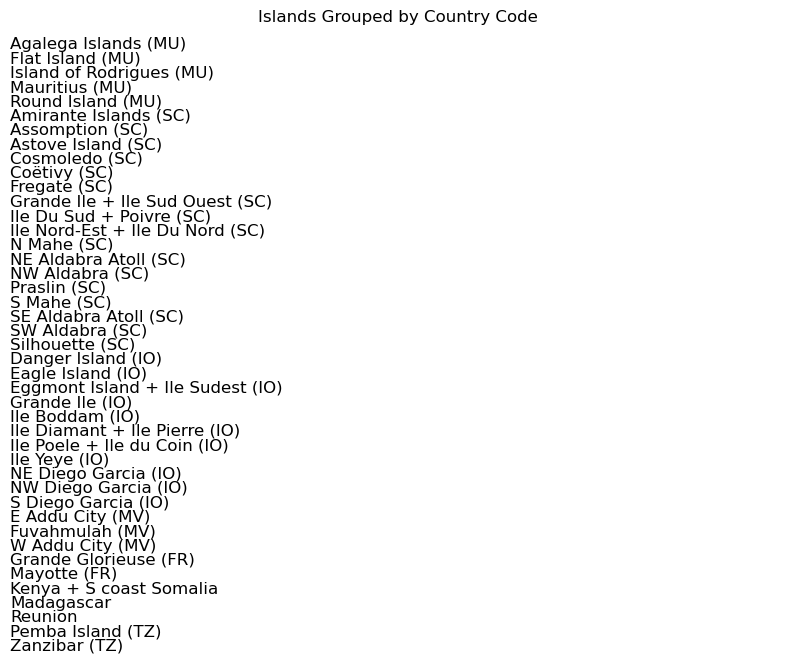

In [8]:
import matplotlib.pyplot as plt

island_names = {
    15: 'Mayotte (FR)', 42: 'Zanzibar (TZ)', 47: 'Pemba Island (TZ)', 58: 'W Addu City (MV)', 59: 'E Addu City (MV)',
    60: 'Fuvahmulah (MV)', 100: 'Kenya + S coast Somalia', 300: 'Madagascar', 6: 'Reunion', 7: 'Mauritius (MU)',
    8: 'Flat Island (MU)', 9: 'Round Island (MU)', 10: 'Island of Rodrigues (MU)', 26: 'Agalega Islands (MU)',
    27: 'Astove Island (SC)', 28: 'Grande Ile + Ile Sud Ouest (SC)', 29: 'Assomption (SC)', 30: 'Cosmoledo (SC)',
    31: 'Ile Nord-Est + Ile Du Nord (SC)', 150: 'NE Aldabra Atoll (SC)', 200: 'SE Aldabra Atoll (SC)',
    220: 'NW Aldabra (SC)', 269: 'SW Aldabra (SC)', 330: 'N Mahe (SC)', 350: 'S Mahe (SC)', 55: 'Fregate (SC)',
    56: 'Silhouette (SC)', 57: 'Praslin (SC)', 46: 'Ile Du Sud + Poivre (SC)', 49: 'Amirante Islands (SC)',
    40: 'Coëtivy (SC)', 23: 'Grande Glorieuse (FR)', 36: 'S Diego Garcia (IO)', 38: 'NW Diego Garcia (IO)',
    39: 'NE Diego Garcia (IO)', 41: 'Eggmont Island + Ile Sudest (IO)', 43: 'Danger Island (IO)',
    45: 'Eagle Island (IO)', 48: 'Ile Poele + Ile du Coin (IO)', 50: 'Grande Ile (IO)', 51: 'Ile Boddam (IO)',
    52: 'Ile Diamant + Ile Pierre (IO)', 53: 'Ile Yeye (IO)'
}

grouped_islands = {}
for id, name in sorted(island_names.items(), key=lambda x: x[1]):
    start = name.find('(')
    end = name.find(')')
    country_code = name[start+1:end] if start != -1 and end != -1 else 'Other'
    if country_code not in grouped_islands:
        grouped_islands[country_code] = []
    grouped_islands[country_code].append(name)

fig, ax = plt.subplots(figsize=(10, 8))
y_ticks = []
y_labels = []
current_tick = 0

for country, names in grouped_islands.items():
    for name in names:
        ax.text(0, current_tick, name, fontsize=12, verticalalignment='center')
        y_ticks.append(current_tick)
        y_labels.append(name)
        current_tick -= 1

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_title('Islands Grouped by Country Code')
ax.axis('off')  

plt.show()
